In [56]:
import pandas as pd
import numpy as np
import sys
import os
import scipy
import warnings
warnings.simplefilter('ignore')

In [5]:
file1 = pd.read_csv('2015_sample.csv')
file2 = pd.read_csv('2015_failures.csv')

In [6]:
file1.tail()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
1424,2015-07-02,PL1331LAGSR92H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,133.0,104.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1425,2015-03-06,MJ1311YNG6116A,Hitachi HDS5C3030ALA630,3000592982016,0,100.0,0.0,135.0,108.0,138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1426,2015-07-13,Z300GQ8H,ST4000DM000,4000787030016,0,118.0,173090296.0,NaN,NaN,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1427,2015-12-10,PL1331LAGSMTBH,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,133.0,104.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1428,2015-08-24,WD-WCAV39124230,WDC WD800AAJB,80026361856,0,200.0,0.0,NaN,NaN,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
file1 = file1.dropna(0, thresh = 20)
file2 = file2.dropna(0, thresh = 20)

In [8]:
file1 = file1.dropna(axis=1)
file2 = file2.dropna(axis=1)

In [9]:
file2.tail()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_12_normalized,smart_12_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
1424,2015-07-06,Z3014PAK,ST4000DM000,4000787030016,1,114.0,71699456.0,91.0,0.0,100.0,...,100.0,19.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1425,2015-07-12,45CHK11QFMYB,TOSHIBA MD04ABA400V,4000787030016,1,100.0,0.0,100.0,5393.0,100.0,...,100.0,2.0,100.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1426,2015-07-12,S1F0GPFZ,ST3000DM001,3000592982016,1,120.0,236544080.0,92.0,0.0,100.0,...,100.0,37.0,26.0,26.0,100.0,0.0,100.0,0.0,200.0,0.0
1427,2015-07-12,Z302AYTQ,ST4000DM000,4000787030016,1,114.0,71729768.0,93.0,0.0,100.0,...,100.0,9.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1428,2015-07-12,S1F0J5JH,ST3000DM001,3000592982016,1,105.0,9995856.0,92.0,0.0,100.0,...,100.0,36.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0


In [10]:
columns = [ 'smart_1_normalized', 'smart_3_normalized', 'smart_4_normalized', 'smart_5_normalized',
           'smart_7_normalized','smart_12_normalized', 'smart_194_normalized', 
           'smart_197_normalized', 'smart_198_normalized', 'smart_199_normalized'
           ]

In [11]:
file2.tail()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_12_normalized,smart_12_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
1424,2015-07-06,Z3014PAK,ST4000DM000,4000787030016,1,114.0,71699456.0,91.0,0.0,100.0,...,100.0,19.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1425,2015-07-12,45CHK11QFMYB,TOSHIBA MD04ABA400V,4000787030016,1,100.0,0.0,100.0,5393.0,100.0,...,100.0,2.0,100.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1426,2015-07-12,S1F0GPFZ,ST3000DM001,3000592982016,1,120.0,236544080.0,92.0,0.0,100.0,...,100.0,37.0,26.0,26.0,100.0,0.0,100.0,0.0,200.0,0.0
1427,2015-07-12,Z302AYTQ,ST4000DM000,4000787030016,1,114.0,71729768.0,93.0,0.0,100.0,...,100.0,9.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1428,2015-07-12,S1F0J5JH,ST3000DM001,3000592982016,1,105.0,9995856.0,92.0,0.0,100.0,...,100.0,36.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0


In [12]:
df = pd.concat([file1,file2])
df1 = df[columns]
y = df['failure']

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
lr1 = LogisticRegression(solver='newton-cg')
lr2 = LogisticRegression(solver='lbfgs')
lr3 = LogisticRegression(solver='saga')
lr4 = LogisticRegression(solver='sag')
lr5 = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier()
boost1 = GradientBoostingClassifier(loss='deviance')
boost2 = GradientBoostingClassifier(loss='exponential')
svm_rbf = SVC(kernel='rbf')

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y, train_size=0.8,random_state=111)
for model in [lr1,lr2,lr3,lr4,lr5,rfc,svm_rbf]:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Trained: ",model)
    print("Precision:",precision_score(y_test,y_pred))
    print("Recall:",recall_score(y_test,y_pred))
    print("Accuracy:",accuracy_score(y_test,y_pred))
    print("F1-Score",f1_score(y_test,y_pred))

Trained:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
Precision: 0.5808219178082191
Recall: 0.7681159420289855
Accuracy: 0.6206293706293706
F1-Score 0.6614664586583463
Trained:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Precision: 0.5808219178082191
Recall: 0.7681159420289855
Accuracy: 0.6206293706293706
F1-Score 0.6614664586583463
Trained:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sa

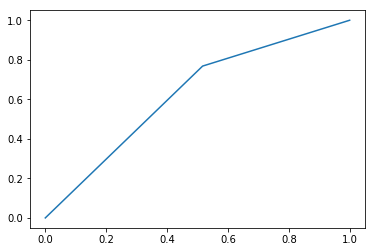

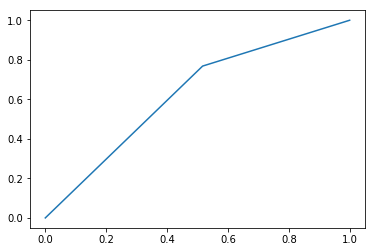

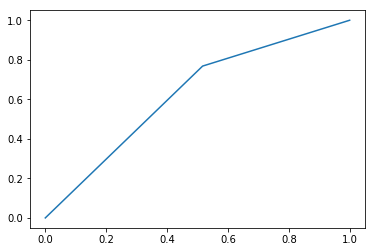

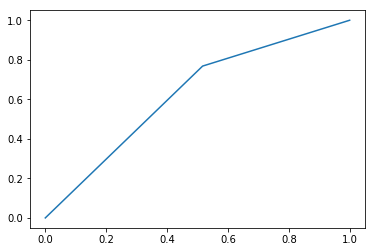

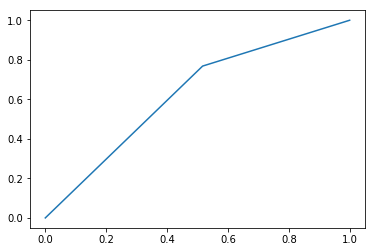

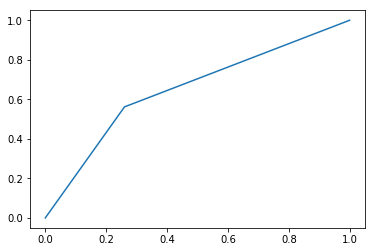

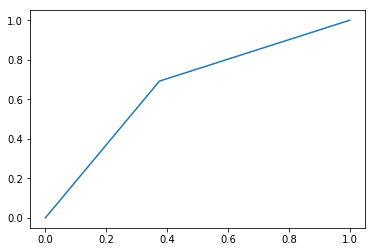

In [71]:
from sklearn import metrics
import matplotlib.pyplot as plt
for model in [lr1,lr2,lr3,lr4,lr5, rfc,boost1]:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=0)
    plt.plot(tpr,fpr)
    plt.show() 

Trained:  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
Precision: 0.7866666666666666
Recall: 0.2209737827715356
Accuracy: 0.6083916083916084
F1-Score 0.34502923976608185


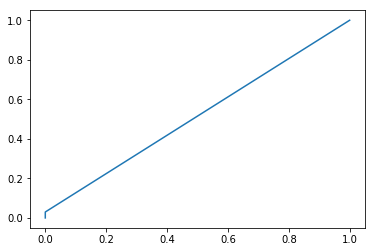

In [55]:
from sklearn import linear_model
model = linear_model.SGDClassifier(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Trained: ",model)
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1-Score",f1_score(y_test,y_pred))
from sklearn import metrics
import matplotlib.pyplot as plt
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=0)
plt.plot(tpr,fpr)
plt.show() 